NONTRANSITIVE RANKING

In manufacturing, we often try to compare the capabilities of various microprocessors for their appropriateness, to certain applications. For intance, suppose we are trying to select from ammong four microprocessors the one that is best suited for image-processing applications. Because many factors, including performance, cost, availability, and software, can affect this decision, coming up with a crisp mathematical model for all these attributes is complicated.
Another consideration is that it is much easier to compare these microprocessors subjectively in pairs rather than all four at one time.
Suppose the design team is polled to determine which of the four microprocessors, labeled x1, x2, x3, and x4, is the most preferred when considered as a group rather than when considered as pairs. First, pairwise membership functions are determined. These represent the subjective measurement of the appropriateness of each microprocessor when compared only to one another. The following pairwise functions are determined:

fx1(x1) = 1;     fx1(x2) = .5;     fx1(x3) = .3;     fx1(x4) = .2;
fx2(x1) = .7;    fx2(x2) = 1;      fx2(x3) = .8;     fx2(x4) = .9;
fx3(x1) = .5;    fx3(x2) = .3;     fx3(x3) = 1;      fx3(x4) = .7;
fx4(x1) = .3;    fx4(x2) = .1;     fx4(x3) = .3;     fx4(x4) = 1;

In [1]:
import numpy as np

In [2]:
preference = np.array([
    [1, .5, .3, .2],
    [.7, 1, .8, .9],
    [.5, .3, 1, .7],
    [.3, .1, .3, 1]
])

In [3]:
def pairwise_function(
    input_matrix: np.array
) -> np.array:
    """
    Calculates the pairwise function for some array
    where i, j positions determine the relation of 
    chosing one option instead of the other
    """

    transposed = input_matrix.T

    max_matrix = np.maximum(input_matrix, transposed)

    n = len(input_matrix)
    C = np.zeros((n, n))
    np.fill_diagonal(C, 1.0)
    
    mask = ~np.eye(n, dtype=bool)
    C[mask] = transposed[mask] / max_matrix[mask]

    return C

In [4]:
c_matrix = pairwise_function(preference)

print("C matrix: ", c_matrix)

C matrix:  [[1.         1.         1.         1.        ]
 [0.71428571 1.         0.375      0.11111111]
 [0.6        1.         1.         0.42857143]
 [0.66666667 1.         1.         1.        ]]


In [5]:
fuzzy_ordering = list()
for line in c_matrix:
    min_value = 1
    for value in line:
        min_value = min(min_value, value)
    fuzzy_ordering.append(min_value)

print("Fuzzy ordering", fuzzy_ordering)

Fuzzy ordering [1, np.float64(0.11111111111111112), np.float64(0.4285714285714286), np.float64(0.6666666666666667)]


PREFERENCE AND CONSENSUS

In [6]:
r_matrix = np.array([
    [0,    1,    .5,    .2,],
    [0,    0,    .3,    .9,],
    [.5,   .7,    0,    .6,],
    [.8,   .1,    .4,    0,],
])

In [7]:
def fuzziness_certainty(
    preference_matrix: np.array
) -> np.array:
    
    """
    Calculates average fuzziness and average certainty for a preference matrix
    
    #eturns
    ------------
    F: Average fuzziness
    C: Average certainty
    """

    n = len(preference_matrix)

    denominator = n * (n - 1) / 2

    preference_squared = np.dot(preference_matrix, preference_matrix)

    preference_transpose = np.dot(preference_matrix, preference_matrix.T)

    trace_squared = np.trace(preference_squared)
    trace_transpose = np.trace(preference_transpose)

    F = trace_squared / denominator
    C = trace_transpose / denominator

    return F, C

In [8]:
f, c = fuzziness_certainty(r_matrix)

In [9]:
print("Mean Fuzziness: ", round(f, 3))
print("Mean Certainty: ", round(c, 3))

Mean Fuzziness:  0.317
Mean Certainty:  0.683


MULTIOBJECTIVE DECISION MAKING

In [10]:
candidates = ['MSE', 'Conc', 'Gab']
q1 = [.4, 1, .1]
q2 = [.7, .8, .4]
q3 = [.2, .4, 1]
q4 = [1, .5, .5]
preferences = [.8, .9, .7, .5]

In [11]:
import matplotlib.pyplot as plt

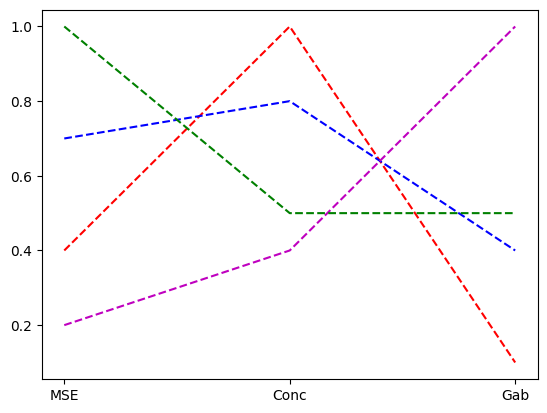

In [12]:
plt.plot(candidates, q1, 'r--')
plt.plot(candidates, q2, 'b--')
plt.plot(candidates, q3, 'm--')
plt.plot(candidates, q4, 'g--')

plt.show()

In [13]:
class MultiObjectiveDecision:

    """
    Class for decision making
    """

    def __init__(
        self,
        alt: dict,
        obj: list
    ):

        """
        Initialize the decision

        Args
        -------
        alt: dict -> {alternative_name: [objective_values]}
        obj: list -> names of the objectives
        """
        
        self.alternatives = alt
        self.objectives = obj
        self.n_objectives = len(obj)

    def decision_values(
        self,
        preferences: list
    ) -> dict:

        """
        Decision values D(a_i) for each alternative

        Args
        -------
        preferences: list with values of each objective's preference

        Returns
        -------
        dict: {alternative: value_1, ....}
        """

        if len(preferences) != self.n_objectives:
            raise ValueError(f"Number of preferences must be equal number of objectives.")

        # b̄ᵢ = 1 - bᵢ
        complements = [round(1- b, 3) for b in preferences]
        # D(a_i) for each alternative
        results = dict()

        for alternative_name, alternative_values in self.alternatives.items():
            if len(alternative_values) != self.n_objectives:
                raise ValueError(
                    f"Alternative {alternative_name} has {len(alternative_values)} values, must expects {self.n_objectives}.")
            # (b̄ᵢ ∪ Oᵢ) for each objective
            union_values = list()
            for i in range(self.n_objectives):
                # b̄ᵢ ∪ Oᵢ = max(b̄ᵢ, Oᵢ)
                union_val = max(complements[i], alternative_values[i])
                union_values.append(union_val)

            # D(a_i) = ∩ (b̄ᵢ ∪ Oᵢ) = min off all union_values
            D_value = min(union_values)
            results[alternative_name] = D_value

            print(
                alternative_name,"\n",
                f"Complements: {complements}\n",
                f"Values O: {alternative_values}\n",
                f"(b̄ᵢ ∪ Oᵢ) : {union_values}",
                f"D({alternative_name}) = min{union_values} = {D_value}"
            )
        
        return results

    def optimal_alternative(
        self,
        decision_values: dict
    ) -> tuple:

        """
        Find the best alternative

        Args
        -----------
        decision_values: dict {alternative: value_D}

        Returns
        ----------
        tuple: (best_alternative, value_D, all_other_alternatives)
        """

        sorted_alternatives = sorted(
            decision_values.items(), key=lambda x: x[1], reverse = True
        )
        best_alt = sorted_alternatives[0][0]
        best_val = sorted_alternatives[0][1]

        return best_alt, best_val, sorted_alternatives

In [14]:
import pandas as pd
from collections import defaultdict

In [15]:
ratings = [q1, q2, q3, q4]
objectives = ['Cost', 'Main', 'SD', 'Env']

alternatives = pd.DataFrame(
    data = ratings,
    index = objectives,
    columns = candidates
)

alternatives_input = defaultdict(list)
for i in range(len(ratings)):
    for j in range(len(candidates)):
        alternatives_input[candidates[j]].append(ratings[i][j])

solver = MultiObjectiveDecision(
    alternatives_input,
    objectives    
)

decision = solver.decision_values(preferences)

best_alt, best_val, all_ranked = solver.optimal_alternative(decision)

MSE 
 Complements: [0.2, 0.1, 0.3, 0.5]
 Values O: [0.4, 0.7, 0.2, 1]
 (b̄ᵢ ∪ Oᵢ) : [0.4, 0.7, 0.3, 1] D(MSE) = min[0.4, 0.7, 0.3, 1] = 0.3
Conc 
 Complements: [0.2, 0.1, 0.3, 0.5]
 Values O: [1, 0.8, 0.4, 0.5]
 (b̄ᵢ ∪ Oᵢ) : [1, 0.8, 0.4, 0.5] D(Conc) = min[1, 0.8, 0.4, 0.5] = 0.4
Gab 
 Complements: [0.2, 0.1, 0.3, 0.5]
 Values O: [0.1, 0.4, 1, 0.5]
 (b̄ᵢ ∪ Oᵢ) : [0.2, 0.4, 1, 0.5] D(Gab) = min[0.2, 0.4, 1, 0.5] = 0.2


In [16]:
for alt, val in alternatives.to_dict().items():
    print(f"{alt:5} - {val}")

print("\nResults")
for alt, val in decision.items():
    print(f"D({alt}) = {round(val, 3)}")
print(f"\nBest alternative: {best_alt} - D = {best_val}")

MSE   - {'Cost': 0.4, 'Main': 0.7, 'SD': 0.2, 'Env': 1.0}
Conc  - {'Cost': 1.0, 'Main': 0.8, 'SD': 0.4, 'Env': 0.5}
Gab   - {'Cost': 0.1, 'Main': 0.4, 'SD': 1.0, 'Env': 0.5}

Results
D(MSE) = 0.3
D(Conc) = 0.4
D(Gab) = 0.2

Best alternative: Conc - D = 0.4


FUZZY BAYESIAN DECISION METHOD

In [17]:
probability = {
    'S1': .5, 'S2': .5
}

states = ['S1', 'S2']
alternatives = ['A1', 'A2']
utility = [
    [5, -10],
    [-2, 4]
]

u_matrix = pd.DataFrame(
    data = utility,
    index = alternatives,
    columns = states
)
print(u_matrix)

    S1  S2
A1   5 -10
A2  -2   4


In [18]:
def expected_utility(
    matrix: pd.DataFrame,
    probability: dict,
    alternative: str
) -> float:

    """
    Expected utility of an alternative

    Args
    -----------
    matrix: utility values
    probability: initial probability of an event
    alternative: which alternative from matrix we are considering
    """

    try:
        matrix_values = matrix.loc[alternative,:].values
    except:
        try:
            matrix_values = matrix.loc[:,alternative].values
        except:
            raise ValueError(f"The alternative: {alternative} wasn't found in the matrix")

    prob_values = np.array([probability[key] for key in probability.keys()])

    return np.dot(matrix_values, prob_values)

In [19]:
expected_utility_a1 = expected_utility(u_matrix, probability, 'A1')
print(expected_utility_a1)

expected_utility_a2 = expected_utility(u_matrix, probability, 'A2')
print(expected_utility_a2)

-2.5
1.0


In [20]:
samples = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']
posterior_prob_ii = {
    'p(xk|S1)': [0, .05, .1, .1, .2, .4, .1, .05],
    'p(xk|S2)': [.05, .1, .4, .2, .1, .1, .05, 0]
}
posterior_prob_pi = {
    'p(xk|S1)': [0, 0, 0, 0, .2, .5, .2, .1],
    'p(xk|S2)': [.1, .2, .5, .2, 0, 0, 0, 0]
}

In [21]:
new_utility = [
    [4, -2],
    [-1, 2]
]

new_u_matrix = pd.DataFrame(
    data = new_utility,
    index = alternatives,
    columns = states
)
print(new_u_matrix)

prob_ii = pd.DataFrame(
    data = posterior_prob_ii.values(),
    index = posterior_prob_ii.keys(),
    columns = samples
)
print(prob_ii)

prob_pi = pd.DataFrame(
    data = posterior_prob_pi.values(),
    index = posterior_prob_pi.keys(),
    columns = samples
)
print(prob_pi)

    S1  S2
A1   4  -2
A2  -1   2
            x1    x2   x3   x4   x5   x6    x7    x8
p(xk|S1)  0.00  0.05  0.1  0.1  0.2  0.4  0.10  0.05
p(xk|S2)  0.05  0.10  0.4  0.2  0.1  0.1  0.05  0.00
           x1   x2   x3   x4   x5   x6   x7   x8
p(xk|S1)  0.0  0.0  0.0  0.0  0.2  0.5  0.2  0.1
p(xk|S2)  0.1  0.2  0.5  0.2  0.0  0.0  0.0  0.0


In [22]:
def marginal_probability(
    matrix: pd.DataFrame,
    probability: dict
) -> list:

    """
    Marginal probabiliy - P(xk) = Σ P(xk|Si) * P(Si)
    """

    n_samples = len(next(iter(matrix.values)))
    marginal = list()

    for i in range(n_samples):
        p_xk = 0
        for state in matrix.index:
            key = state[-3:-1]
            p_xk += matrix.loc[state, matrix.columns[i]] * probability[key]

        marginal.append(round(p_xk, 3))

    return marginal

In [23]:
p_xk_ii = marginal_probability(prob_ii, probability)
p_xk_pi = marginal_probability(prob_pi, probability)

print("Marginal probability")
print("\nImperfect information ", "\n", p_xk_ii)
print("\nPerfect information ", "\n", p_xk_pi)

Marginal probability

Imperfect information  
 [np.float64(0.025), np.float64(0.075), np.float64(0.25), np.float64(0.15), np.float64(0.15), np.float64(0.25), np.float64(0.075), np.float64(0.025)]

Perfect information  
 [np.float64(0.05), np.float64(0.1), np.float64(0.25), np.float64(0.1), np.float64(0.1), np.float64(0.25), np.float64(0.1), np.float64(0.05)]


In [24]:
posterior_probability_ii = pd.DataFrame(
    data = [
        [
            prob_ii.loc[key, column] * probability[key[-3:-1]] / p_xk_ii[col_idx]
            for col_idx, column in enumerate(samples)
        ] for key in prob_ii.index
        ],
    index = ['p(S1|xk)', 'p(S2|xk)'],
    columns = samples
)
posterior_probability_pi = pd.DataFrame(
    data = [
        [
            prob_pi.loc[key, column] * probability[key[-3:-1]] / p_xk_ii[col_idx]
            for col_idx, column in enumerate(samples)
        ] for key in prob_pi.index
    ],
    index = ['p(S1|xk)', 'p(S2|xk)'],
    columns = samples
)

print("Naive Bayes")
print("\nImperfect information ", "\n", posterior_probability_ii)
print("\nPerfect information ", "\n", posterior_probability_pi)

Naive Bayes

Imperfect information  
            x1        x2   x3        x4        x5   x6        x7   x8
p(S1|xk)  0.0  0.333333  0.2  0.333333  0.666667  0.8  0.666667  1.0
p(S2|xk)  1.0  0.666667  0.8  0.666667  0.333333  0.2  0.333333  0.0

Perfect information  
            x1        x2   x3        x4        x5   x6        x7   x8
p(S1|xk)  0.0  0.000000  0.0  0.000000  0.666667  1.0  1.333333  2.0
p(S2|xk)  2.0  1.333333  1.0  0.666667  0.000000  0.0  0.000000  0.0


In [25]:
def conditional_expected_utility(
    matrix: pd.DataFrame,
    naive_bayes: pd.DataFrame,
    alternative: str,
    conditional: str
) -> float:

    """
    Expected utility of an alternative - E(u_j|x_k) = Σ u_ji * P(S_i|x_k)

    Args
    -----------
    matrix: utility values
    naive_bayes: posterior probability values
    alternative: which alternative from matrix we are considering
    conditional: which condition from naive_bayes we are considering
    """

    utility_values = matrix.loc[alternative].values
    prob_values = naive_bayes[conditional].values
    
    return np.dot(utility_values, prob_values)

In [26]:
# Imperfect information
conditional_E_s1_xk_ii = [round(conditional_expected_utility(new_u_matrix, posterior_probability_ii, 'A1', 'x'+str(i)), 3)
                     for i in range(1, 9)]
conditional_E_s2_xk_ii = [round(conditional_expected_utility(new_u_matrix, posterior_probability_ii, 'A2', 'x'+str(i)), 3)
                     for i in range(1, 9)]

# Perfect information
conditional_E_s1_xk_pi = [round(conditional_expected_utility(new_u_matrix, posterior_probability_pi, 'A1', 'x'+str(i)), 3)
                     for i in range(1, 9)]
conditional_E_s2_xk_pi = [round(conditional_expected_utility(new_u_matrix, posterior_probability_pi, 'A2', 'x'+str(i)), 3)
                     for i in range(1, 9)]

print("Conditional utility of S if xk")
print("\nImperfet information ", "\n", conditional_E_s1_xk_ii, "\n", conditional_E_s2_xk_ii)
print("\nPerfect information ", "\n", conditional_E_s1_xk_pi, "\n", conditional_E_s2_xk_pi)

Conditional utility of S if xk

Imperfet information  
 [np.float64(-2.0), np.float64(0.0), np.float64(-0.8), np.float64(0.0), np.float64(2.0), np.float64(2.8), np.float64(2.0), np.float64(4.0)] 
 [np.float64(2.0), np.float64(1.0), np.float64(1.4), np.float64(1.0), np.float64(0.0), np.float64(-0.4), np.float64(0.0), np.float64(-1.0)]

Perfect information  
 [np.float64(-4.0), np.float64(-2.667), np.float64(-2.0), np.float64(-1.333), np.float64(2.667), np.float64(4.0), np.float64(5.333), np.float64(8.0)] 
 [np.float64(4.0), np.float64(2.667), np.float64(2.0), np.float64(1.333), np.float64(-0.667), np.float64(-1.0), np.float64(-1.333), np.float64(-2.0)]


In [27]:
# unconditional maximum expected utility
E_xk_ii_max = [
    max(conditional_E_s1_xk_ii[i], conditional_E_s2_xk_ii[i])
    for i in range(8)
]

E_xk_pi_max = [
    max(conditional_E_s1_xk_pi[i], conditional_E_s2_xk_pi[i])
    for i in range(8)
]

E_max_ii = np.dot(E_xk_ii_max, p_xk_ii)
E_max_pi = np.dot(E_xk_pi_max, p_xk_pi)

print("Maximum unconditional utility")
print("\nImperfect information ", "\n", E_max_ii)
print("\nPerfect information ", "\n", E_max_pi)

Maximum unconditional utility

Imperfect information  
 1.875

Perfect information  
 3.3


In [28]:
# Values of the information
E_u_A1 = expected_utility(new_u_matrix, probability, 'A1')
E_u_A2 = expected_utility(new_u_matrix, probability, 'A2')
E_u_no_info = max(E_u_A1, E_u_A2)

V_ii = E_max_ii - E_u_no_info
V_pi = E_max_pi - E_u_no_info

print("Value of the information")
print("\nImperfect information ", "\n", V_ii)
print("\nPerfect information ", "\n", V_pi)

Value of the information

Imperfect information  
 0.875

Perfect information  
 2.3


FOR FUZZY CASES, JUST NEED TO MAKE THE PRODUCT BETWEEN MEMBERSHIP FUNCTION AND MARGINAL PROBABILITY FOR EACH VARIABLE